In [ ]:
# ============================================
# ANÁLISIS DE ESTACIONALIDAD - CANAL DE PANAMÁ
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración visual
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Cargar datos
df = pd.read_csv('peces_canal_panama_ML_limpio.csv')
df['Date'] = pd.to_datetime(df['Date'])

print("=" * 60)
print("ANÁLISIS DE ESTACIONALIDAD EN CAPTURAS DE PECES")
print("Canal de Panamá (2004-2025)")
print("=" * 60)

ANÁLISIS DE ESTACIONALIDAD EN CAPTURAS DE PECES
Canal de Panamá (2004-2025)


In [ ]:
# 2. DIAGNÓSTICO DEL DISEÑO DE MUESTREO
print("\n" + "="*60)
print("PASO 1: EVALUACIÓN DEL DISEÑO DE MUESTREO")
print("="*60)

# ¿Qué meses tenemos?
meses_con_datos = sorted(df['MES'].unique())
todos_los_meses = list(range(1, 13))
meses_sin_datos = [m for m in todos_los_meses if m not in meses_con_datos]

print(f"\nMeses con datos: {meses_con_datos}")
print(f"Meses SIN datos: {meses_sin_datos}")
print(f"Cobertura: {len(meses_con_datos)}/12 meses")

# ¿Algún año tiene todos los meses?
print("\nCobertura por año:")
year_month_table = pd.crosstab(df['AÑO'], df['MES'])
print(year_month_table)

# Contar años completos
anos_con_12_meses = 0
for year in df['AÑO'].unique():
    meses_del_ano = df[df['AÑO']==year]['MES'].nunique()
    if meses_del_ano == 12:
        anos_con_12_meses += 1

print(f"\n⚠️ Años con ciclo completo (12 meses): {anos_con_12_meses}")


PASO 1: EVALUACIÓN DEL DISEÑO DE MUESTREO

Meses con datos: [np.int64(3), np.int64(4), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
Meses SIN datos: [1, 2, 5, 11, 12]
Cobertura: 7/12 meses

Cobertura por año:
MES     3     4     6     7     8    9    10
AÑO                                         
2004     0     0     0     0  1628    0    0
2005     0     0     0     0  1665    0    0
2011     0     0     0     0     0  518    0
2016   703     0     0   703     0    0    0
2018   999     0  1147     0     0    0    0
2020     0     0     0     0     0  925    0
2021     0  1184     0  1036     0    0    0
2022     0   999     0   999     0    0    0
2023     0   962     0   999     0    0    0
2024   999     0     0   962     0    0  962
2025  1036     0     0     0     0    0    0

⚠️ Años con ciclo completo (12 meses): 0


In [ ]:
# 3. ANÁLISIS BÁSICO POR MES
print("\n" + "="*60)
print("PASO 2: ESTADÍSTICAS BÁSICAS POR MES")
print("="*60)

# Calcular estadísticas por mes
print("\nAbundancia por mes:")
for mes in sorted(df['MES'].unique()):
    datos_mes = df[df['MES']==mes]['TOTAL']
    promedio = datos_mes.mean()
    desviacion = datos_mes.std()
    n_observaciones = len(datos_mes)
    print(f"Mes {mes:2d}: Promedio={promedio:6.1f} ± {desviacion:6.1f} (n={n_observaciones})")

# Comparación por estación climática
print("\nAbundancia por estación climática:")
seca_data = df[df['Estacion_clima']=='SECA']['TOTAL']
lluvia_data = df[df['Estacion_clima']=='LLUVIOSA']['TOTAL']

print(f"SECA:     {seca_data.mean():.1f} ± {seca_data.std():.1f} (n={len(seca_data)})")
print(f"LLUVIOSA: {lluvia_data.mean():.1f} ± {lluvia_data.std():.1f} (n={len(lluvia_data)})")

# Test estadístico
u_statistic, p_value = stats.mannwhitneyu(seca_data, lluvia_data)
print(f"\nTest Mann-Whitney U: p-valor = {p_value:.4f}")
if p_value < 0.05:
    print("✅ Diferencia estadísticamente significativa")
else:
    print("❌ NO hay diferencia estadísticamente significativa")


PASO 2: ESTADÍSTICAS BÁSICAS POR MES

Abundancia por mes:
Mes  3: Promedio=   8.4 ±   15.0 (n=3737)
Mes  4: Promedio=  16.2 ±   23.6 (n=3145)
Mes  6: Promedio=  11.5 ±   16.9 (n=1147)
Mes  7: Promedio=  14.6 ±   29.7 (n=4699)
Mes  8: Promedio=  15.8 ±   31.0 (n=3293)
Mes  9: Promedio=   7.8 ±   11.3 (n=1443)
Mes 10: Promedio=  16.7 ±   25.7 (n=962)

Abundancia por estación climática:
SECA:     12.0 ± 19.8 (n=6882)
LLUVIOSA: 13.9 ± 27.2 (n=11544)

Test Mann-Whitney U: p-valor = 0.1101
❌ NO hay diferencia estadísticamente significativa



PASO 3: VISUALIZACIÓN DE PATRONES


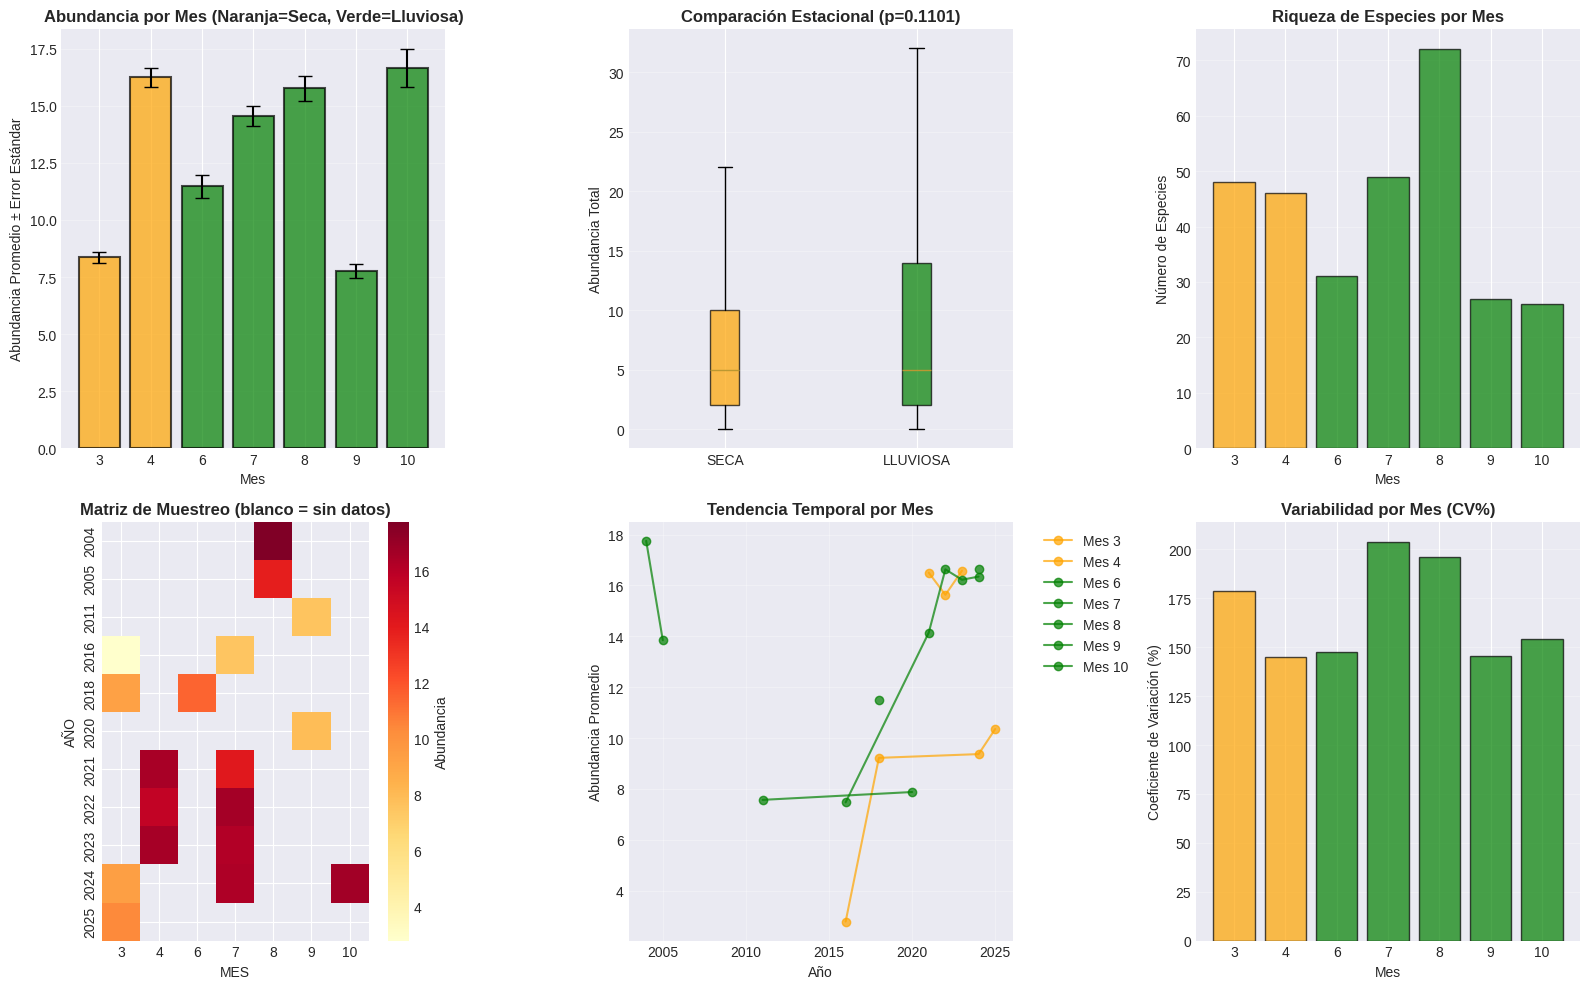

In [ ]:
# 4. VISUALIZACIÓN COMPLETA
print("\n" + "="*60)
print("PASO 3: VISUALIZACIÓN DE PATRONES")
print("="*60)

fig = plt.figure(figsize=(16, 10))

# GRÁFICO 1: Abundancia promedio por mes
ax1 = plt.subplot(2, 3, 1)

# Preparar datos
meses_disponibles = sorted(df['MES'].unique())
promedios = []
errores = []

for mes in meses_disponibles:
    datos_mes = df[df['MES']==mes]['TOTAL']
    promedios.append(datos_mes.mean())
    error_estandar = datos_mes.std() / np.sqrt(len(datos_mes))
    errores.append(error_estandar)

# Definir colores (naranja=seca, verde=lluviosa)
colores = []
for mes in meses_disponibles:
    if mes in [1, 2, 3, 4, 12]:  # Meses típicamente secos en Panamá
        colores.append('orange')
    else:
        colores.append('green')

# Crear gráfico de barras
barras = ax1.bar(range(len(meses_disponibles)), promedios,
                 yerr=errores, capsize=5, alpha=0.7)

# Aplicar colores
for barra, color in zip(barras, colores):
    barra.set_color(color)
    barra.set_edgecolor('black')
    barra.set_linewidth(1.5)

ax1.set_title('Abundancia por Mes (Naranja=Seca, Verde=Lluviosa)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Abundancia Promedio ± Error Estándar')
ax1.set_xticks(range(len(meses_disponibles)))
ax1.set_xticklabels(meses_disponibles)
ax1.grid(axis='y', alpha=0.3)

# GRÁFICO 2: Comparación entre estaciones
ax2 = plt.subplot(2, 3, 2)

bp = ax2.boxplot([seca_data, lluvia_data],
                  labels=['SECA', 'LLUVIOSA'],
                  patch_artist=True,
                  showfliers=False)

# Colorear las cajas
bp['boxes'][0].set_facecolor('orange')
bp['boxes'][0].set_alpha(0.7)
bp['boxes'][1].set_facecolor('green')
bp['boxes'][1].set_alpha(0.7)

ax2.set_title(f'Comparación Estacional (p={p_value:.4f})', fontsize=12, fontweight='bold')
ax2.set_ylabel('Abundancia Total')
ax2.grid(axis='y', alpha=0.3)

# GRÁFICO 3: Número de especies por mes
ax3 = plt.subplot(2, 3, 3)

especies_por_mes = []
for mes in meses_disponibles:
    n_especies = df[df['MES']==mes]['Especies'].nunique()
    especies_por_mes.append(n_especies)

barras_sp = ax3.bar(range(len(meses_disponibles)), especies_por_mes, alpha=0.7)
for barra, color in zip(barras_sp, colores):
    barra.set_color(color)
    barra.set_edgecolor('black')

ax3.set_title('Riqueza de Especies por Mes', fontsize=12, fontweight='bold')
ax3.set_xlabel('Mes')
ax3.set_ylabel('Número de Especies')
ax3.set_xticks(range(len(meses_disponibles)))
ax3.set_xticklabels(meses_disponibles)
ax3.grid(axis='y', alpha=0.3)

# GRÁFICO 4: Heatmap de muestreo
ax4 = plt.subplot(2, 3, 4)

pivot_table = df.pivot_table(values='TOTAL', index='AÑO', columns='MES', aggfunc='mean')
sns.heatmap(pivot_table, mask=pivot_table.isna(), cmap='YlOrRd',
            ax=ax4, cbar_kws={'label': 'Abundancia'}, square=True)
ax4.set_title('Matriz de Muestreo (blanco = sin datos)', fontsize=12, fontweight='bold')

# GRÁFICO 5: Tendencias por mes a través de los años
ax5 = plt.subplot(2, 3, 5)

for mes in meses_disponibles:
    datos_por_ano = df[df['MES']==mes].groupby('AÑO')['TOTAL'].mean()
    color = 'orange' if mes in [1,2,3,4,12] else 'green'
    ax5.plot(datos_por_ano.index, datos_por_ano.values,
             marker='o', label=f'Mes {mes}', alpha=0.7, color=color)

ax5.set_title('Tendencia Temporal por Mes', fontsize=12, fontweight='bold')
ax5.set_xlabel('Año')
ax5.set_ylabel('Abundancia Promedio')
ax5.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax5.grid(alpha=0.3)

# GRÁFICO 6: Coeficiente de variación
ax6 = plt.subplot(2, 3, 6)

coef_variacion = []
for mes in meses_disponibles:
    datos_mes = df[df['MES']==mes]['TOTAL']
    cv = (datos_mes.std() / datos_mes.mean()) * 100
    coef_variacion.append(cv)

barras_cv = ax6.bar(range(len(meses_disponibles)), coef_variacion, alpha=0.7)
for barra, color in zip(barras_cv, colores):
    barra.set_color(color)
    barra.set_edgecolor('black')

ax6.set_title('Variabilidad por Mes (CV%)', fontsize=12, fontweight='bold')
ax6.set_xlabel('Mes')
ax6.set_ylabel('Coeficiente de Variación (%)')
ax6.set_xticks(range(len(meses_disponibles)))
ax6.set_xticklabels(meses_disponibles)
ax6.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('estacionalidad_analisis_completo.png', dpi=300)
plt.show()

In [ ]:
# 5. EVALUACIÓN DE LA HIPÓTESIS ECOLÓGICA
print("\n" + "="*60)
print("PASO 4: EVALUACIÓN DE LA HIPÓTESIS")
print("="*60)

print("\n📌 HIPÓTESIS ORIGINAL:")
print("'Esperaríamos picos de abundancia durante las transiciones")
print("entre estación seca y lluviosa (abril-mayo y noviembre-diciembre)")
print("cuando se movilizan nutrientes.'")

print("\n🔍 EVALUACIÓN:")

# ¿Tenemos los meses de transición?
meses_transicion_hipotesis = [4, 5, 11, 12]  # abril, mayo, noviembre, diciembre
meses_transicion_disponibles = [m for m in meses_transicion_hipotesis if m in meses_con_datos]

print(f"\nMeses de transición esperados: {meses_transicion_hipotesis}")
print(f"Meses de transición disponibles: {meses_transicion_disponibles}")

if 5 not in meses_con_datos:
    print("❌ Mayo (transición seca→lluviosa) NO está disponible")
if 11 not in meses_con_datos:
    print("❌ Noviembre (transición lluviosa→seca) NO está disponible")
if 12 not in meses_con_datos:
    print("❌ Diciembre (transición lluviosa→seca) NO está disponible")

# Evaluar abril si está disponible
if 4 in meses_con_datos:
    abril_mean = df[df['MES']==4]['TOTAL'].mean()
    print(f"\n✓ Abril disponible: Abundancia promedio = {abril_mean:.1f}")

    # Comparar con otros meses
    print("  Comparación con otros meses:")
    for mes in meses_disponibles:
        if mes != 4:
            mes_mean = df[df['MES']==mes]['TOTAL'].mean()
            if mes_mean < abril_mean:
                print(f"    Mes {mes}: {mes_mean:.1f} (menor que abril)")


PASO 4: EVALUACIÓN DE LA HIPÓTESIS

📌 HIPÓTESIS ORIGINAL:
'Esperaríamos picos de abundancia durante las transiciones
entre estación seca y lluviosa (abril-mayo y noviembre-diciembre)
cuando se movilizan nutrientes.'

🔍 EVALUACIÓN:

Meses de transición esperados: [4, 5, 11, 12]
Meses de transición disponibles: [4]
❌ Mayo (transición seca→lluviosa) NO está disponible
❌ Noviembre (transición lluviosa→seca) NO está disponible
❌ Diciembre (transición lluviosa→seca) NO está disponible

✓ Abril disponible: Abundancia promedio = 16.2
  Comparación con otros meses:
    Mes 3: 8.4 (menor que abril)
    Mes 6: 11.5 (menor que abril)
    Mes 7: 14.6 (menor que abril)
    Mes 8: 15.8 (menor que abril)
    Mes 9: 7.8 (menor que abril)
